In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Qzp-rc7vro74Kn8Rqv6sFwGYbdW4_Iwc

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From: https://drive.google.com/uc?id=1Qzp-rc7vro74Kn8Rqv6sFwGYbdW4_Iwc
To: /content/heart.csv
100% 38.1k/38.1k [00:00<00:00, 41.8MB/s]


In [2]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
heart_data = pd.read_csv('/content/heart.csv')
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


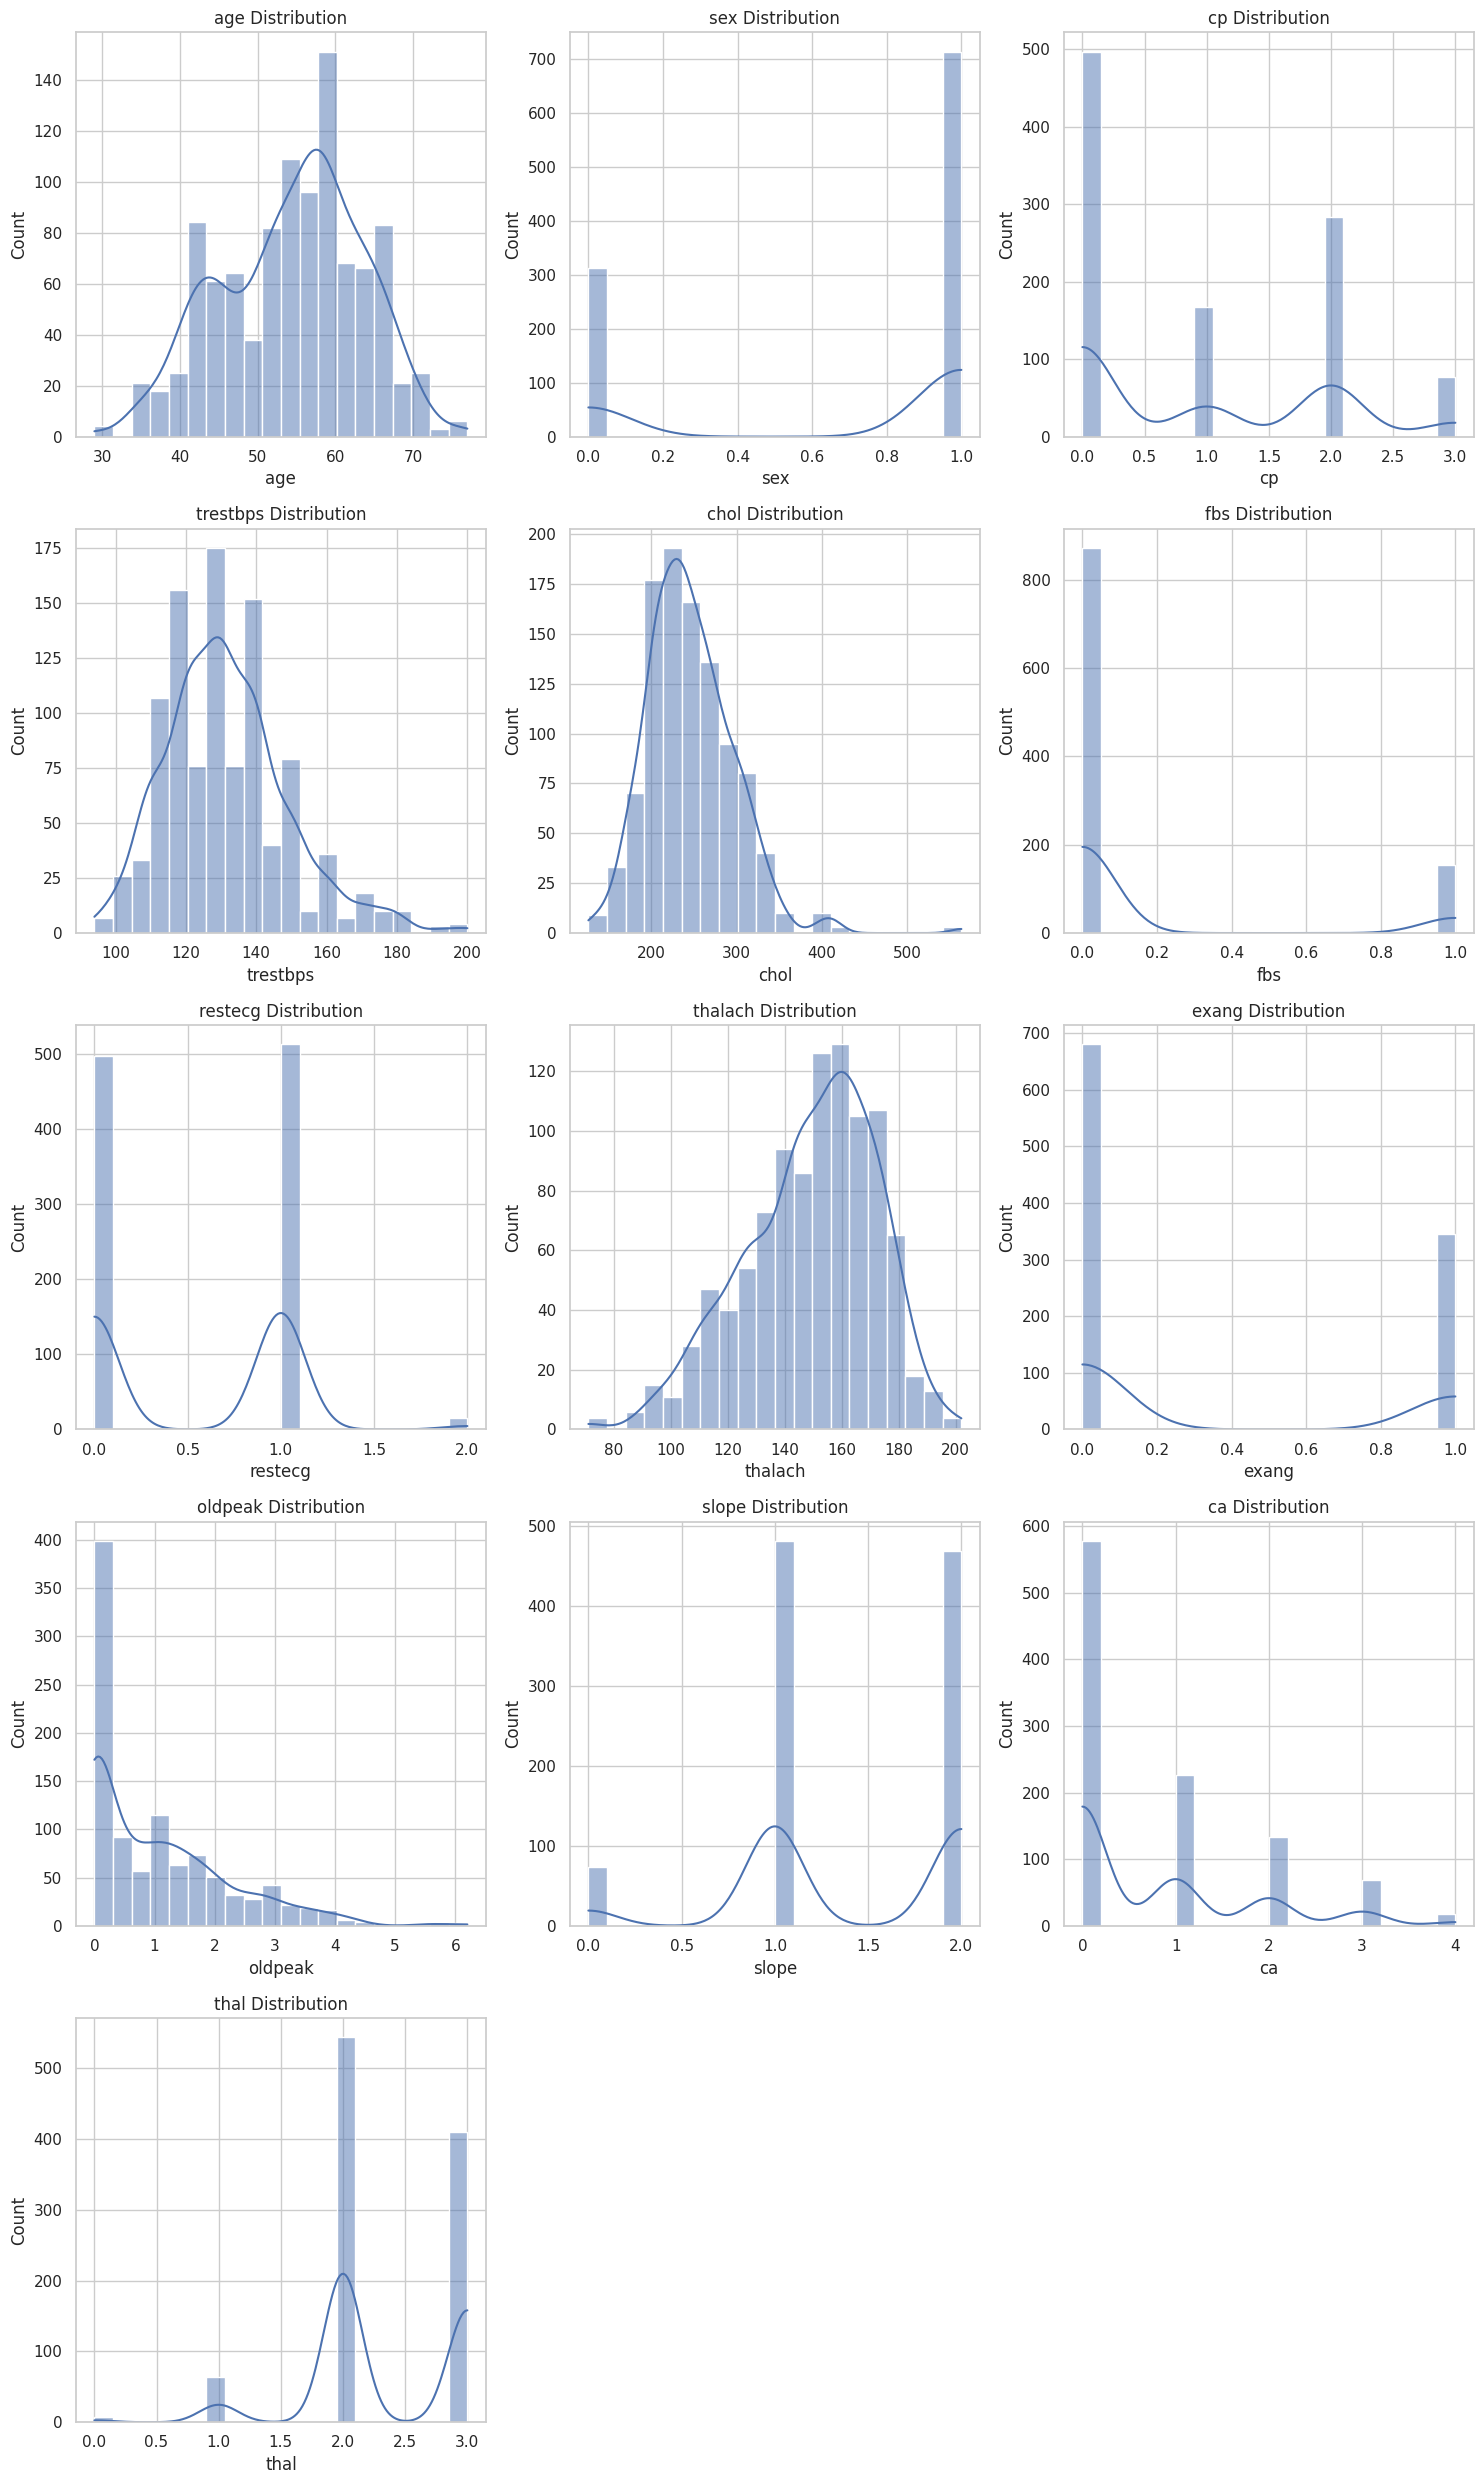

In [ ]:
sns.set(style="whitegrid")

features = heart_data.columns[:-1]

n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(heart_data[feature], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'{feature} Distribution')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

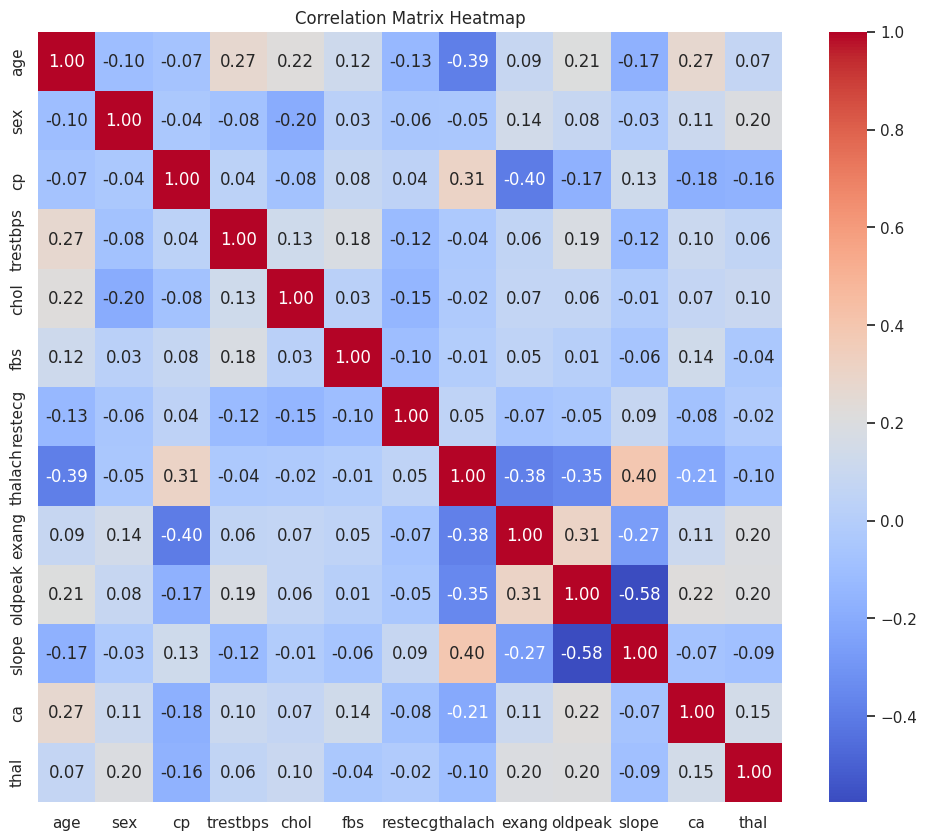

In [ ]:
heart_data1 = heart_data.drop(columns='target')
correlation_matrix = heart_data1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(heart_data.drop(columns='target'), heart_data['target'], test_size=0.2, random_state=64)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train


array([[-1.65537213,  0.67180908, -0.92968874, ..., -0.62601821,
        -0.70305671,  1.10610207],
       [ 1.19332702, -1.48851815, -0.92968874, ..., -0.62601821,
         2.23330918,  1.10610207],
       [ 0.42636956, -1.48851815, -0.92968874, ..., -0.62601821,
        -0.70305671, -0.50778351],
       ...,
       [-1.32667607,  0.67180908,  0.05271431, ...,  0.98824259,
        -0.70305671, -0.50778351],
       [-1.32667607,  0.67180908, -0.92968874, ..., -0.62601821,
        -0.70305671, -2.12166909],
       [ 1.30289238, -1.48851815, -0.92968874, ..., -0.62601821,
         1.25452055,  1.10610207]])

Results for GaussianNB:

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       113
           1       0.77      0.86      0.81        92

    accuracy                           0.82       205
   macro avg       0.82      0.83      0.82       205
weighted avg       0.83      0.82      0.82       205

Accuracy: 0.824390243902439



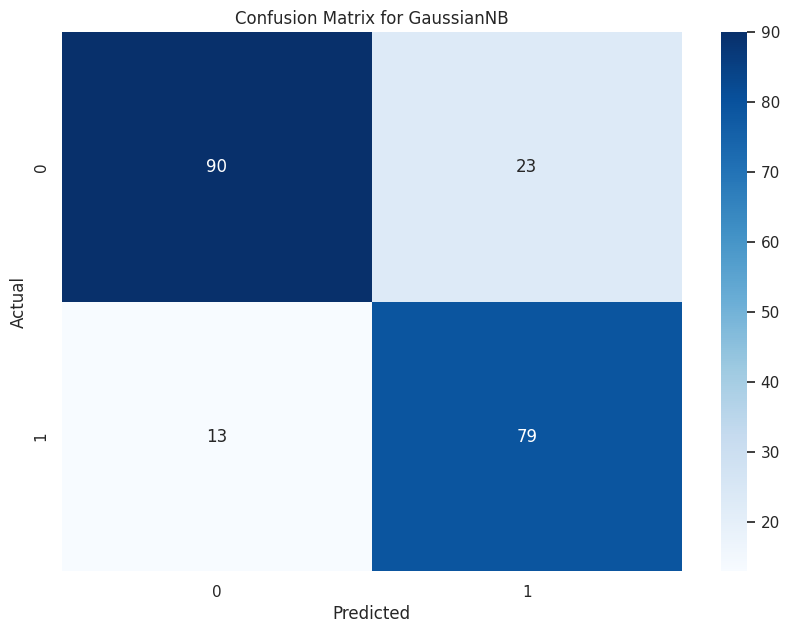

Results for GradientBoosting:

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       113
           1       0.99      0.96      0.97        92

    accuracy                           0.98       205
   macro avg       0.98      0.97      0.98       205
weighted avg       0.98      0.98      0.98       205

Accuracy: 0.975609756097561



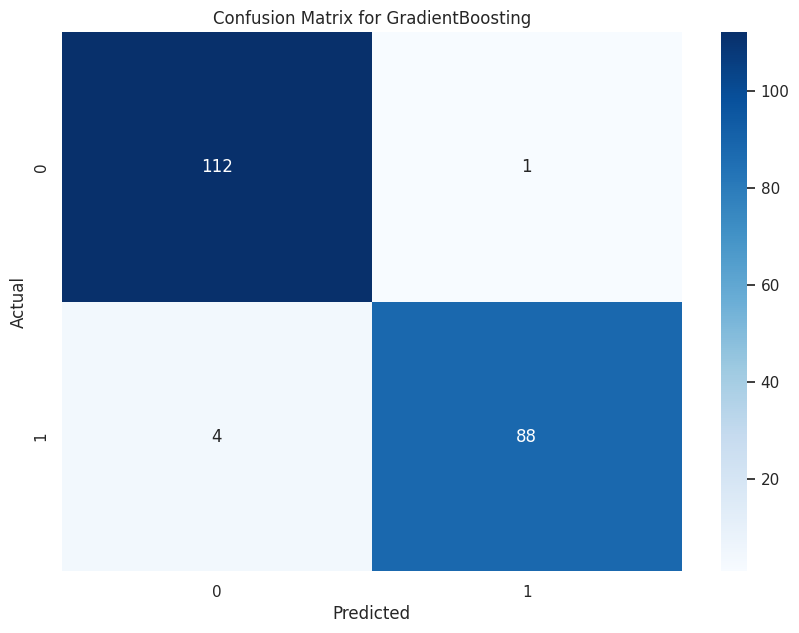

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "GaussianNB": GaussianNB(),
    "GradientBoosting": GradientBoostingClassifier(random_state=64)
}

results = {}
LE = LabelEncoder()
LE.fit(y_train)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        "class_report": class_report,
        "accuracy": accuracy
    }

    print(f"Results for {model_name}:")
    print("\nClassification Report:")
    print(class_report)
    print(f"Accuracy: {accuracy}\n")

    # Generate and display the confusion matrix heatmap
    class_labels = LE.classes_
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

In [ ]:
np.random.seed(64)
random_indices = np.random.choice(len(X_test), 5, replace=False)
sample_features = X_test[random_indices]
sample_true = y_test.iloc[random_indices]
sample_preds = {model_name: model.predict(sample_features) for model_name, model in models.items()}

sample_comparison = pd.DataFrame({
    "True Labels": sample_true.values
}, index=random_indices)

for model_name, preds in sample_preds.items():
    sample_comparison[f"{model_name} Predicted"] = preds

print("\nSample Comparison:")
print(sample_comparison)



Sample Comparison:
     True Labels  GaussianNB Predicted  GradientBoosting Predicted
74             0                     0                           0
112            1                     1                           1
42             0                     1                           0
150            0                     0                           0
55             0                     0                           0
